In [1]:

import networkx as nx
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def GraphToFile(G, filename):
    nx.Graph(G)
    saveFile = open(filename, 'w')
    txt = 'graph Prim_1 {'
    saveFile.write(txt)
    try:
        [saveFile.write('\n' + u + '--' + v + ' [Label = "' + str(G[u][v]['weight']) + '"];') for u, v, d in
     G.edges(data=True)]
    except:
        [saveFile.write('\n' + str(u) + '--' + str(v) + ';') for u, v, d in
     G.edges(data=True)]
    #[print(u,v) for u, v, d in G.edges(data=True)]
    saveFile.write('\n }')
    saveFile.close()

In [2]:
def SerieToNetMod(serie):
    arrG1=[]
    G=nx.Graph()
    for Na in range (len(serie)):
        ya=serie[Na]
        maxslp=-1000
        for Nb in range(Na,len(serie)):
            yb=serie[Nb]
            slp=(yb-ya)/(Nb-Na)
            if slp > maxslp:
                arrG1.append((Na,Nb))
                maxslp=slp
                
    
    for i in range(len(serie)):
        G.add_node(i, y=serie[i])
                                    
    G.add_edges_from(arrG1)
    
    return(G)
            

In [3]:
def PlotSerieDist(title,serie):
    
    dss= plt.figure()
    cx=dss.add_axes([0,0,1,1])
    cx=sns.distplot( serie ,rug=True, kde=True,
    kde_kws={"color": "r", "alpha":0.2, "linewidth": 5, "shade":True }
    )
    cx.set_title('Series Distribution')
    cx.set_xlabel('Magnitude')
    dss.savefig(title+'_seriesDist.png',dpi=200, bbox_inches='tight')

In [4]:
def PlotDegDist(title,gradlist):
    
        
    dsd= plt.figure()
    bx=dsd.add_axes([0,0,1,1])
    bx=sns.distplot( gradlist ,rug=True, kde=True,
    kde_kws={"color": "g", "alpha":0.2, "linewidth": 5, "shade":True }
    )
    bx.set_title('Degree Distribution')
    bx.set_xlabel('Nodes with Degree')
    dsd.savefig(title+'_DegreeDist.png',dpi=200, bbox_inches='tight')
        


In [5]:
def PlotSerie(title,serie):
    ps=plt.figure()
    ax=ps.add_axes([0,0,1,1])
    ax.stem(serie)
    ax.set_title('time-Series')
    ax.set_xlabel('time')
    ax.set_ylabel('magnitude')
    ps.savefig(title+'_series.png', dpi=200, bbox_inches='tight')

In [33]:
def routine1(siz,n,path):
    for i in range(n):
        start_time = time.time()
        serie=np.random.randint(1,100,siz)
#         serie=np.cumsum(s)
        G1=SerieToNetMod(serie)
    
        titl=path+'brown_'+str(siz)+'_'+str(i)
#         nx.write_gml(G1, str(titl)+'.gml')
        GraphToFile(G1,titl+'.gv')
        gradlist=[ node[1] for node in G1.degree()]
        PlotDegDist(titl,gradlist)
        PlotSerie(titl,serie)
        PlotSerieDist(titl,serie)

        print("--- %s seconds ---" % (time.time() - start_time))
        print(len(G1.edges()))


/home/eric/anaconda3/envs/Networks/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


--- 29.048101902008057 seconds ---
13580
--- 30.700304746627808 seconds ---
13566
--- 32.01707100868225 seconds ---
13495
--- 28.167771100997925 seconds ---
13566
--- 27.24945306777954 seconds ---
13514
--- 26.144468784332275 seconds ---
13573


/home/eric/anaconda3/envs/Networks/lib/python3.7/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


--- 26.904679536819458 seconds ---
13530
--- 26.798566102981567 seconds ---
13640
--- 26.449455738067627 seconds ---
13552
--- 27.956626176834106 seconds ---
13469


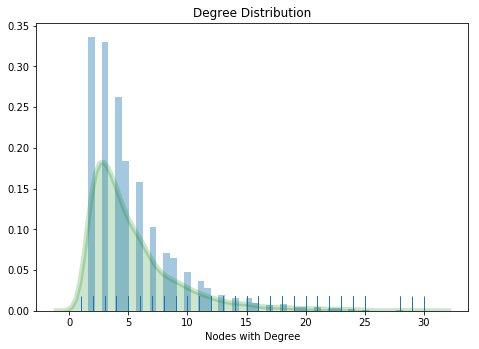

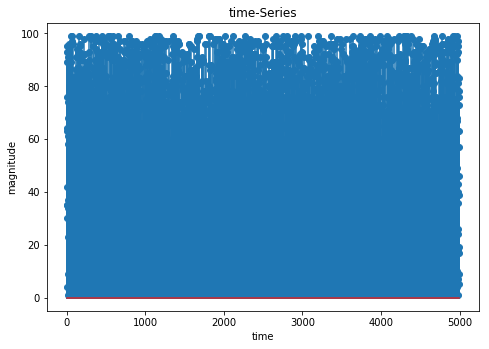

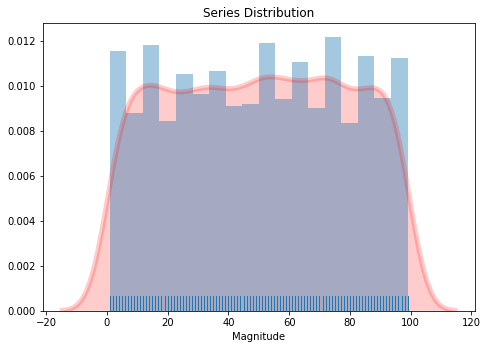

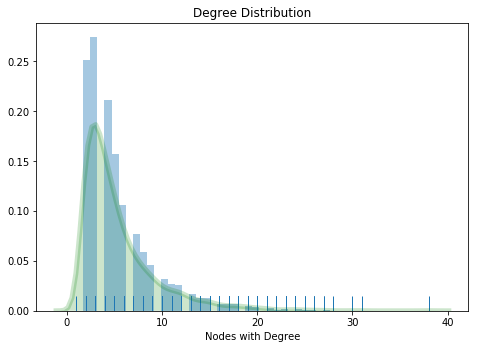

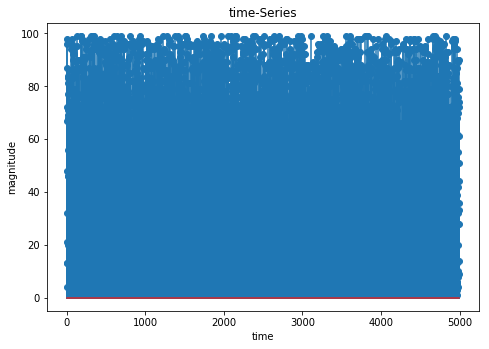

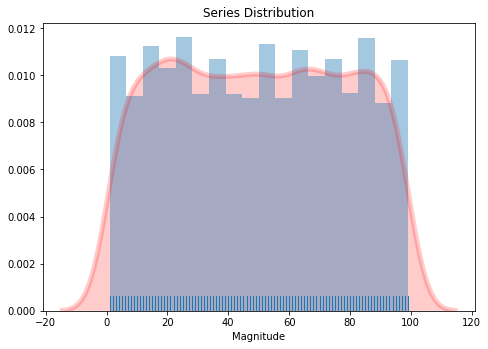

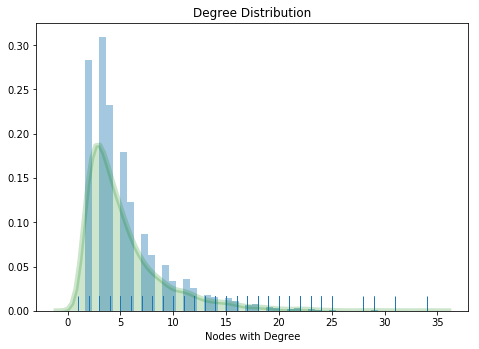

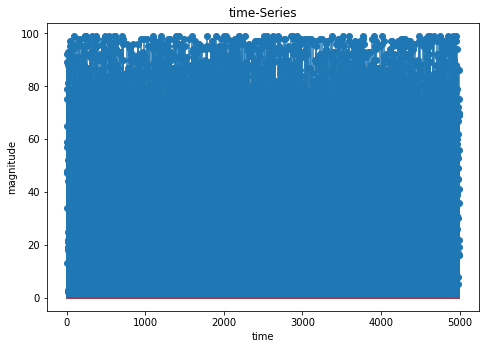

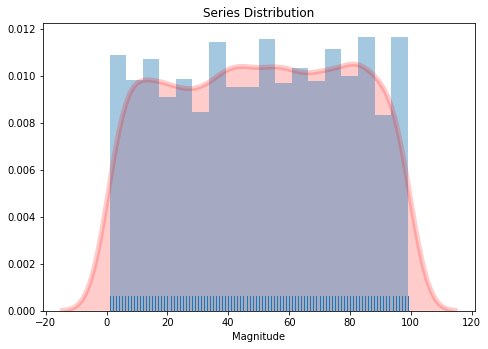

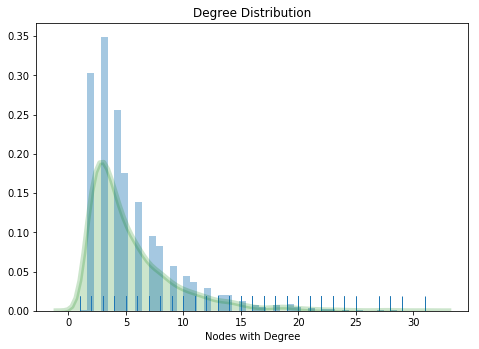

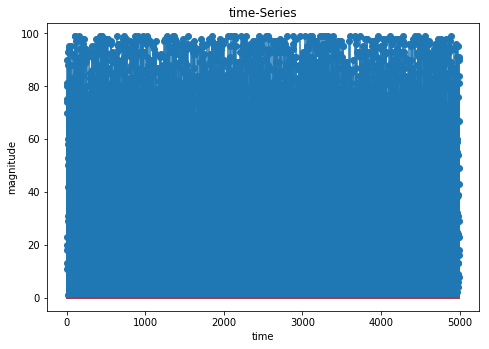

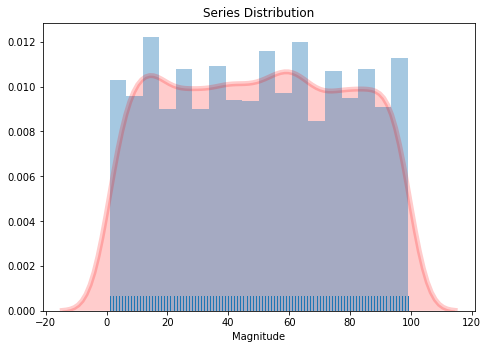

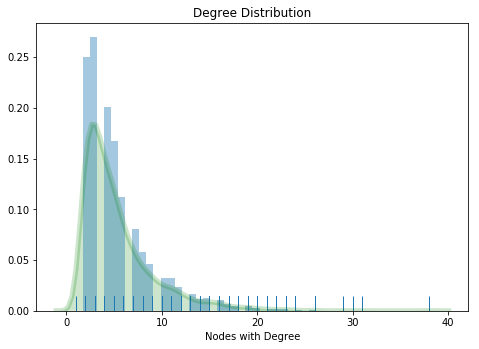

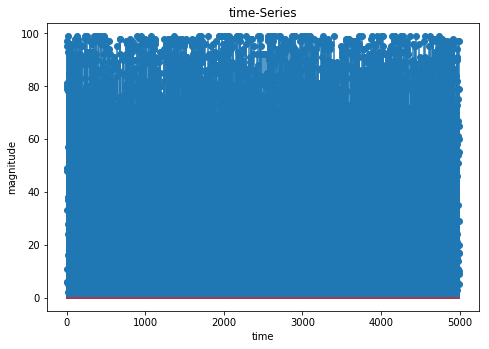

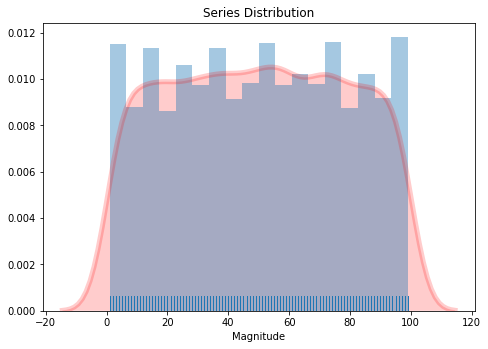

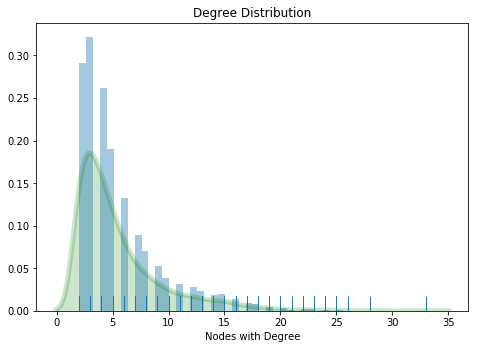

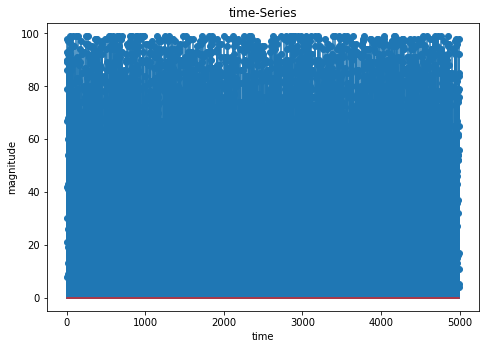

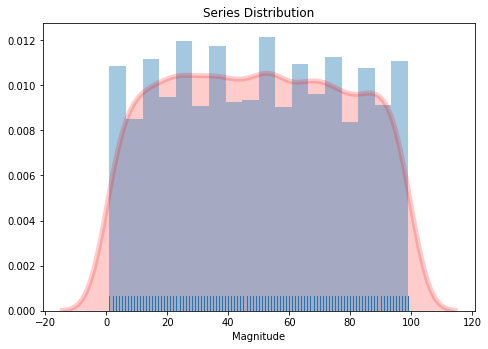

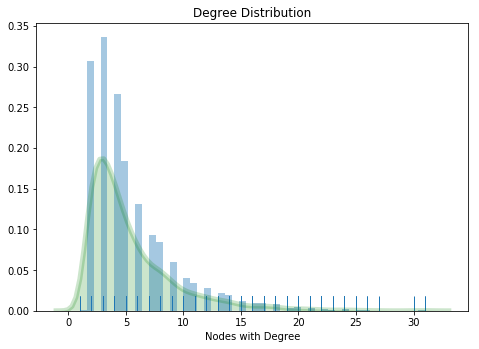

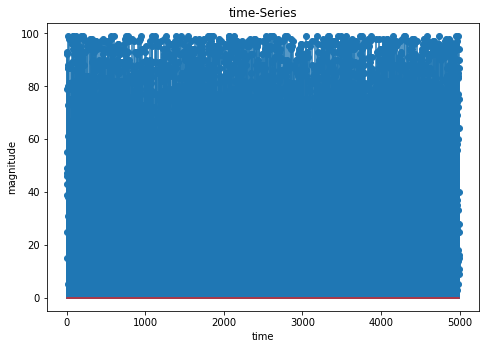

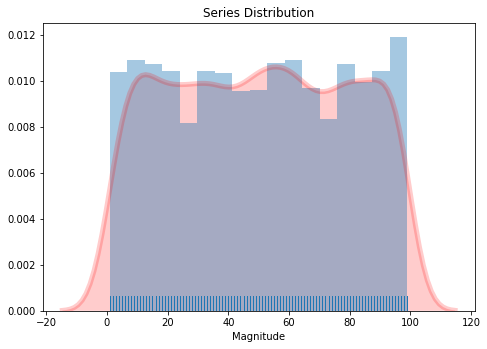

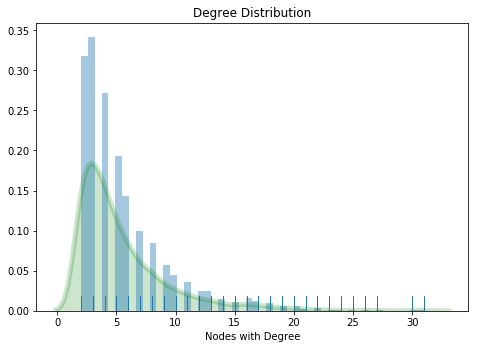

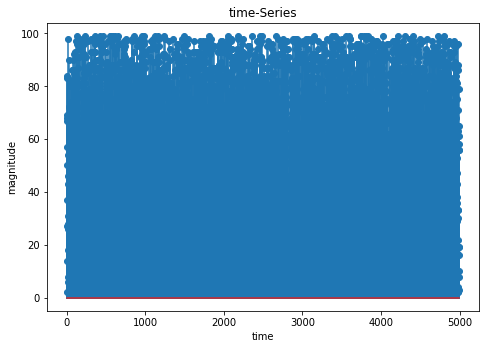

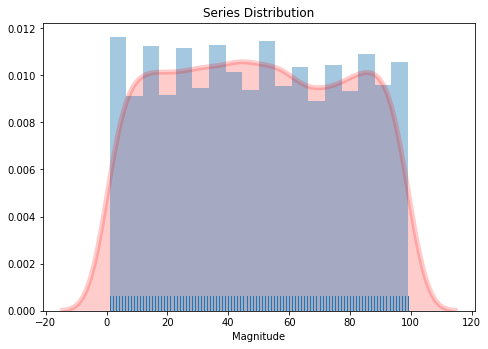

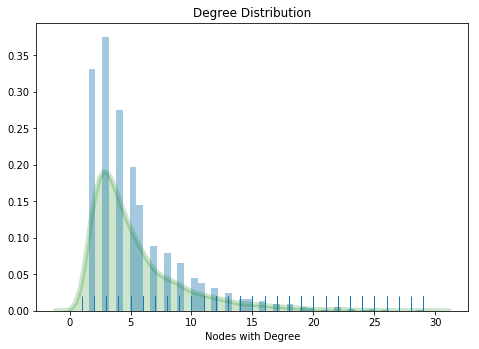

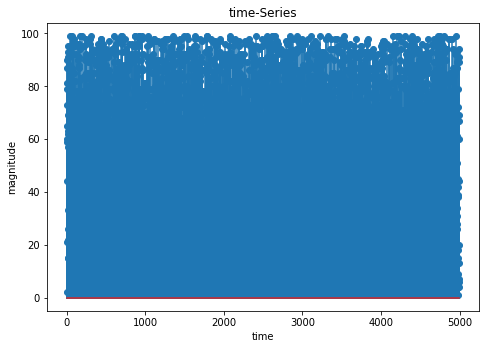

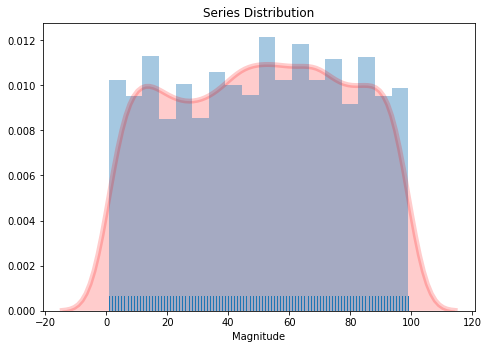

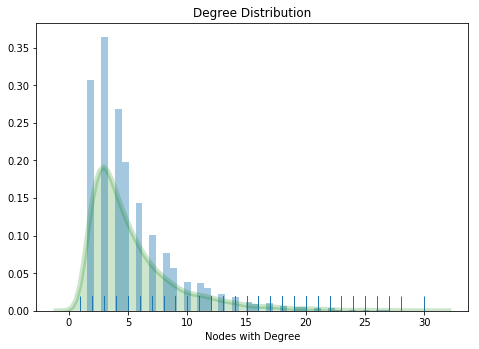

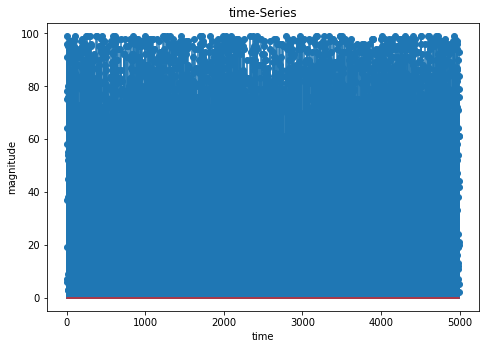

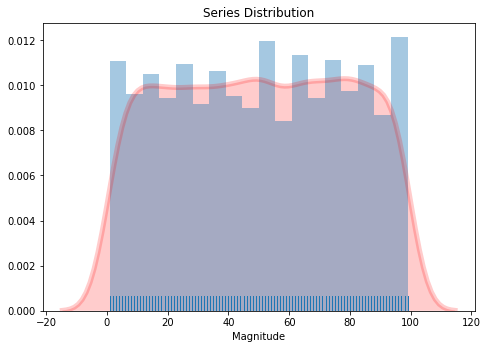

In [35]:
path='./vis1/rand5000/'
routine1(5000,10,path)